In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
! pip install --user researchpy

In [3]:
import researchpy # for t-test stuff! 

In [4]:
df = pd.read_csv('minmax_OAS_with_Returns_Final_NO_Outliers_IG.csv') 

In [5]:
df.head()

,Date,OAS,Total Return % 1-mo-LOC,Agg Returns,Excess Return % 1-mo (Treasury),Excess Return % 1-mo (Agg),Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg),Quadrant
0,1997-01-31 00:00:00,0.032073,0.584587,0.517158,0.511626,0.396204,0.523567,0.400107,0.497321,0.463135,0.456587,0.526603,0.411268,0.507779,0.321350,0.437807,0.389493,0.394455,4
1,1997-02-28 00:00:00,0.022910,0.593261,0.509066,0.551748,0.466362,0.494901,0.455225,0.503095,0.605420,0.427400,0.512503,0.411863,0.501391,0.331717,0.463633,0.371790,0.400467,4
2,1997-03-31 00:00:00,0.013746,0.477740,0.317745,0.511322,0.405427,0.457001,0.448342,0.478600,0.528539,0.411794,0.528331,0.420693,0.524060,0.342466,0.418786,0.345951,0.383512,4
3,1997-04-30 00:00:00,0.022910,0.697805,0.685033,0.448404,0.513258,0.478501,0.542739,0.470552,0.588306,0.392140,0.521106,0.431853,0.513958,0.358566,0.445930,0.308511,0.380955,4
4,1997-05-31 00:00:00,0.032073,0.643998,0.607264,0.468161,0.451746,0.516262,0.714240,0.426636,0.569584,0.410815,0.517072,0.440628,0.540596,0.363678,0.441016,0.285278,0.339880,4


In [6]:
df = df.drop(columns=["Total Return % 1-mo-LOC", "Agg Returns" ,
"Excess Return % 1-mo (Treasury)", "Excess Return % 1-mo (Agg)"], axis = 0) # get rid of these useless columns

In [7]:
df.describe()

,OAS,Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg),Quadrant
count,279.000000,277.000000,277.000000,274.000000,274.000000,270.000000,270.000000,267.000000,267.000000,257.000000,257.000000,245.000000,245.000000,279.00000
mean,0.417782,0.494780,0.503562,0.482637,0.502400,0.492097,0.498393,0.491650,0.504837,0.509006,0.492070,0.501216,0.509136,2.55914
std,0.243309,0.227093,0.207410,0.224126,0.208517,0.216277,0.201213,0.212409,0.208761,0.226952,0.198216,0.196648,0.187849,1.08418
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
25%,0.238259,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,2.00000
50%,0.375716,0.516951,0.505593,0.477463,0.484370,0.501543,0.487557,0.504171,0.498794,0.502269,0.492280,0.526284,0.541649,3.00000
75%,0.542955,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,3.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.00000


# drop outliers that we have identified as 0 and 1s (1 is > upper fence, 0 is < lower fence)

In [8]:
# Getting rid of outliers below. When we ran the script to label outliers, the script
# would label a number an outlier a 1 if it was above the Upper fence and would label
# it a 0 if it was an outlier below the lower fence.
# This script replaces all outliers as "NaN"

df["OAS"] = df["OAS"].replace([0],["NaN"])
df["OAS"] = df["OAS"].replace([1],["Nan"])

df = df.dropna()

df['OAS'] = pd.to_numeric(df['OAS'],errors='coerce') # converting back to float64 

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245 entries, 0 to 244
Data columns (total 15 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Date                              245 non-null    object 
 1   OAS                               231 non-null    float64
 2   Excess Return % 3-mo (Treasury)   245 non-null    float64
 3   Excess Return % 3-mo (Agg)        245 non-null    float64
 4   Excess Return % 6-mo (Treasury)   245 non-null    float64
 5   Excess Return % 6-mo (Agg)        245 non-null    float64
 6   Excess Return % 9-mo (Treasury)   245 non-null    float64
 7   Excess Return % 9-mo (Agg)        245 non-null    float64
 8   Excess Return % 12-mo (Treasury)  245 non-null    float64
 9   Excess Return % 12-mo (Agg)       245 non-null    float64
 10  Excess Return % 24-mo (Treasury)  245 non-null    float64
 11  Excess Return % 24-mo (Agg)       245 non-null    float64
 12  Excess R

# Now lets select all OAS levels and their coresponding excess returns that are above the 80th percentile (top 20%)

In [9]:
# Select * 
# From OAS
# Where OAS >= 80th percentile
## SQL version above ## 
highspread = df["OAS"].quantile(.80) # every data point over the 80th percentile
print(highspread)

# pandas version of the SQL function 
df = df[(df['OAS'] > highspread)]

0.5773195879999999


In [10]:
df.describe()

,OAS,Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg),Quadrant
count,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
mean,0.727606,0.522510,0.589374,0.557639,0.603242,0.582577,0.587425,0.577893,0.606712,0.683445,0.642426,0.646902,0.654904,2.311111
std,0.112295,0.323309,0.271444,0.296343,0.283262,0.284226,0.280267,0.271834,0.282411,0.187559,0.121966,0.076246,0.067431,1.144596
min,0.581901,0.000000,0.025155,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.264213,0.344911,0.439550,0.509455,1.000000
25%,0.636884,0.257718,0.347160,0.387532,0.428894,0.489169,0.559646,0.486457,0.543354,0.556062,0.615817,0.587211,0.616676,1.000000
50%,0.691867,0.587514,0.629886,0.639653,0.691200,0.686296,0.680219,0.660618,0.719861,0.734211,0.657385,0.654176,0.653028,2.000000
75%,0.792669,0.757856,0.845066,0.789596,0.787802,0.771311,0.760924,0.764680,0.804257,0.832625,0.721799,0.690917,0.695228,3.000000
max,0.966781,1.000000,1.000000,1.000000,1.000000,0.915222,0.907077,0.874431,0.938608,0.998973,0.876645,0.810577,0.805064,4.000000


In [11]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 3-mo (Treasury)'])

des, res

(                          Variable     N      Mean        SD        SE  \
 0                              OAS  45.0  0.727606  0.112295  0.016740   
 1  Excess Return % 3-mo (Treasury)  45.0  0.522510  0.323309  0.048196   
 2                         combined  90.0  0.625058  0.261812  0.027597   
 
    95% Conf.  Interval  
 0   0.693869  0.761343  
 1   0.425377  0.619643  
 2   0.570223  0.679894  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 3-mo (Treasu...   0.2051
 1                              Degrees of freedom =   88.0000
 2                                               t =    4.0199
 3                           Two side test p value =    0.0001
 4                          Difference < 0 p value =    0.9999
 5                          Difference > 0 p value =    0.0001
 6                                       Cohen's d =    0.8475
 7                                       Hedge's g =    0.8402
 8                        

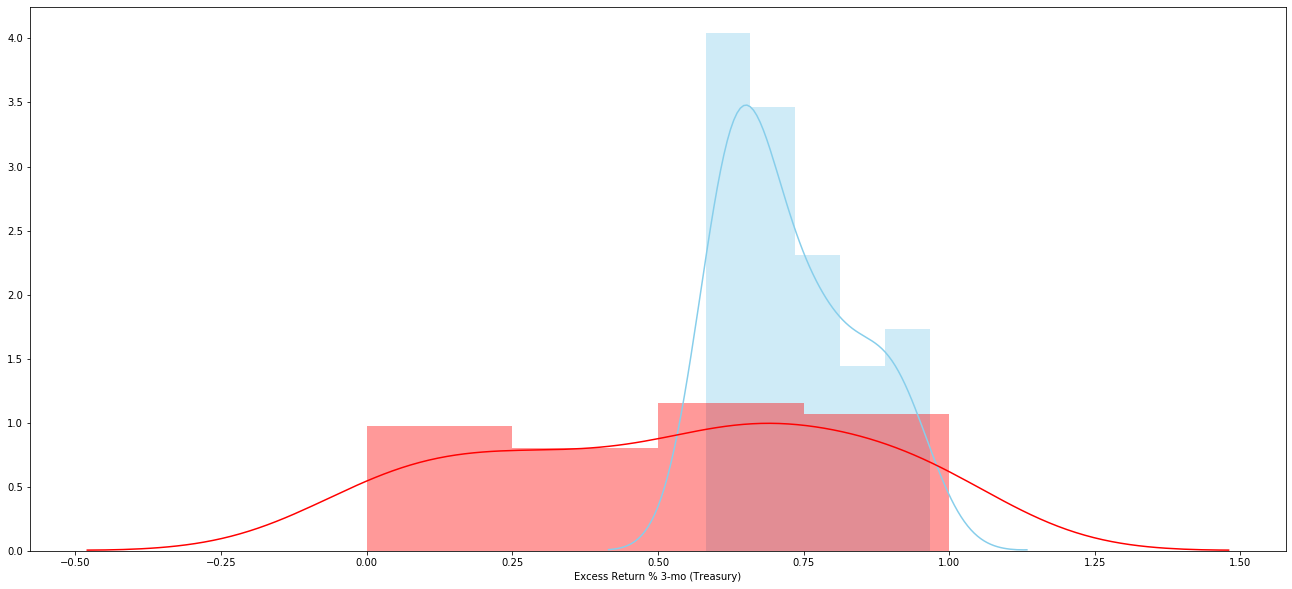

In [12]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 3-mo (Treasury)"], color="red", label="3M_Tres._Normalized_Value")

In [13]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 3-mo (Agg)'])

des, res

(                     Variable     N      Mean        SD        SE  95% Conf.  \
 0                         OAS  45.0  0.727606  0.112295  0.016740   0.693869   
 1  Excess Return % 3-mo (Agg)  45.0  0.589374  0.271444  0.040464   0.507823   
 2                    combined  90.0  0.658490  0.217926  0.022971   0.612846   
 
    Interval  
 0  0.761343  
 1  0.670925  
 2  0.704134  ,
                                  Independent t-test  results
 0  Difference (OAS - Excess Return % 3-mo (Agg)) =    0.1382
 1                             Degrees of freedom =   88.0000
 2                                              t =    3.1567
 3                          Two side test p value =    0.0022
 4                         Difference < 0 p value =    0.9989
 5                         Difference > 0 p value =    0.0011
 6                                      Cohen's d =    0.6655
 7                                      Hedge's g =    0.6598
 8                                  Glass's delta =    

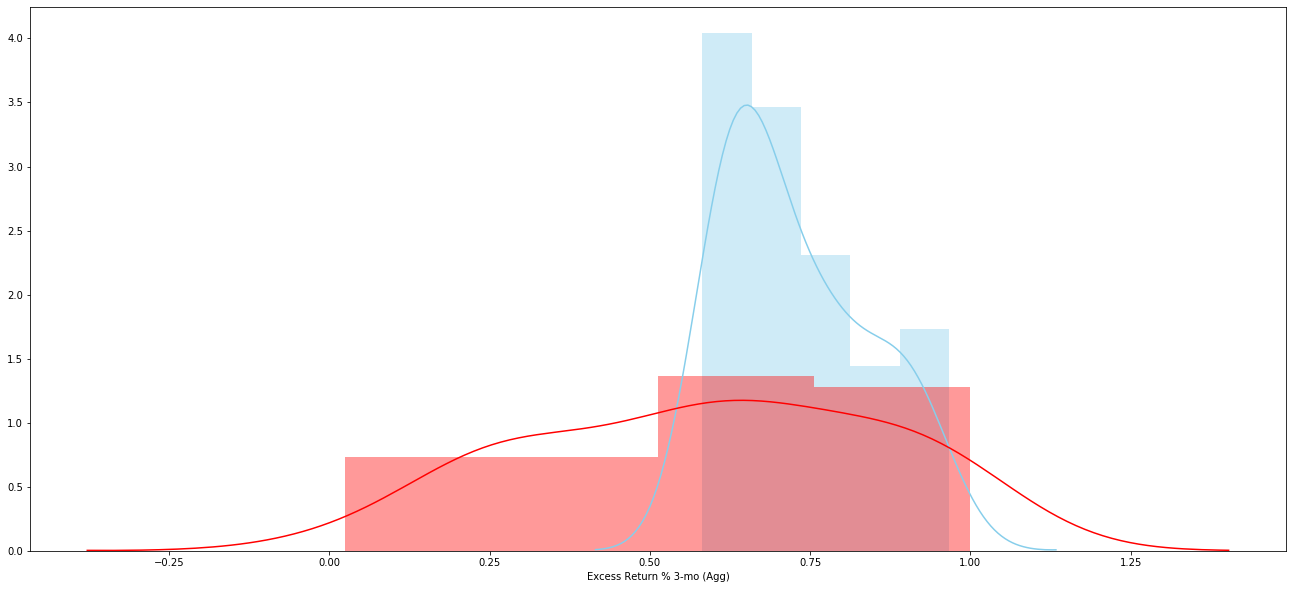

In [14]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 3-mo (Agg)"], color="red", label="3M_Agg._Normalized_Value")

In [15]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 6-mo (Treasury)'])

des, res

(                          Variable     N      Mean        SD        SE  \
 0                              OAS  45.0  0.727606  0.112295  0.016740   
 1  Excess Return % 6-mo (Treasury)  45.0  0.557639  0.296343  0.044176   
 2                         combined  90.0  0.642623  0.238650  0.025156   
 
    95% Conf.  Interval  
 0   0.693869  0.761343  
 1   0.468608  0.646671  
 2   0.592638  0.692607  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 6-mo (Treasu...   0.1700
 1                              Degrees of freedom =   88.0000
 2                                               t =    3.5978
 3                           Two side test p value =    0.0005
 4                          Difference < 0 p value =    0.9997
 5                          Difference > 0 p value =    0.0003
 6                                       Cohen's d =    0.7585
 7                                       Hedge's g =    0.7520
 8                        

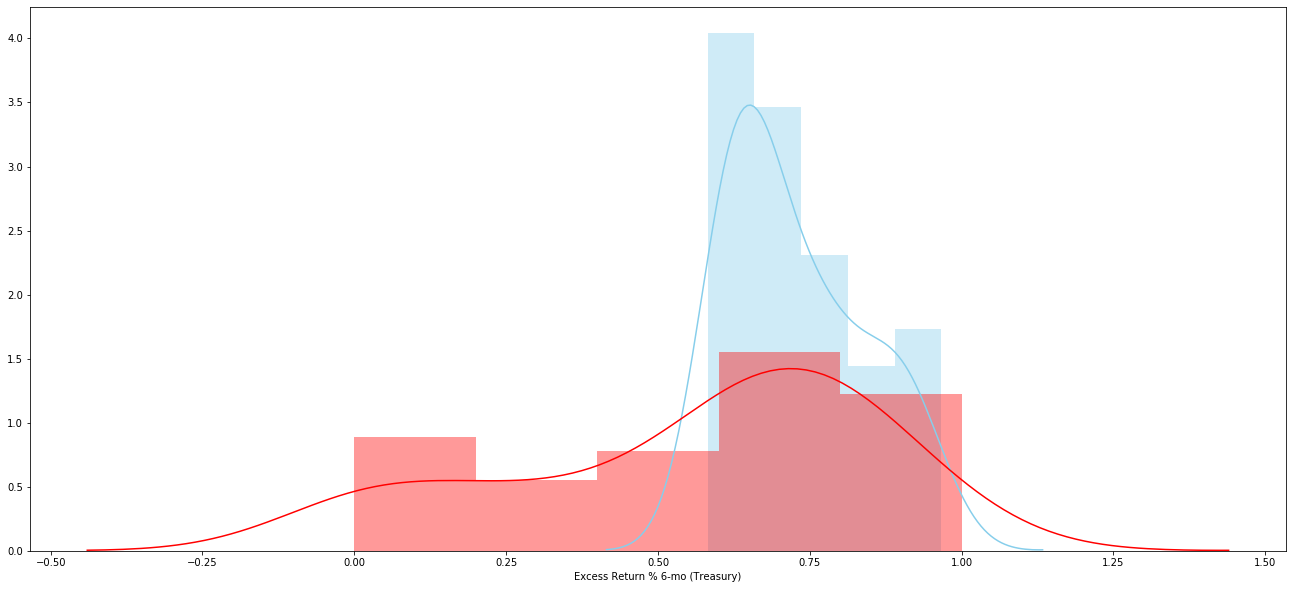

In [16]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 6-mo (Treasury)"], color="red", label="6M_Tres._Normalized_Value")

In [17]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 6-mo (Agg)'])

des, res

(                     Variable     N      Mean        SD        SE  95% Conf.  \
 0                         OAS  45.0  0.727606  0.112295  0.016740   0.693869   
 1  Excess Return % 6-mo (Agg)  45.0  0.603242  0.283262  0.042226   0.518140   
 2                    combined  90.0  0.665424  0.223187  0.023526   0.618678   
 
    Interval  
 0  0.761343  
 1  0.688343  
 2  0.712169  ,
                                  Independent t-test  results
 0  Difference (OAS - Excess Return % 6-mo (Agg)) =    0.1244
 1                             Degrees of freedom =   88.0000
 2                                              t =    2.7379
 3                          Two side test p value =    0.0075
 4                         Difference < 0 p value =    0.9963
 5                         Difference > 0 p value =    0.0037
 6                                      Cohen's d =    0.5772
 7                                      Hedge's g =    0.5723
 8                                  Glass's delta =    

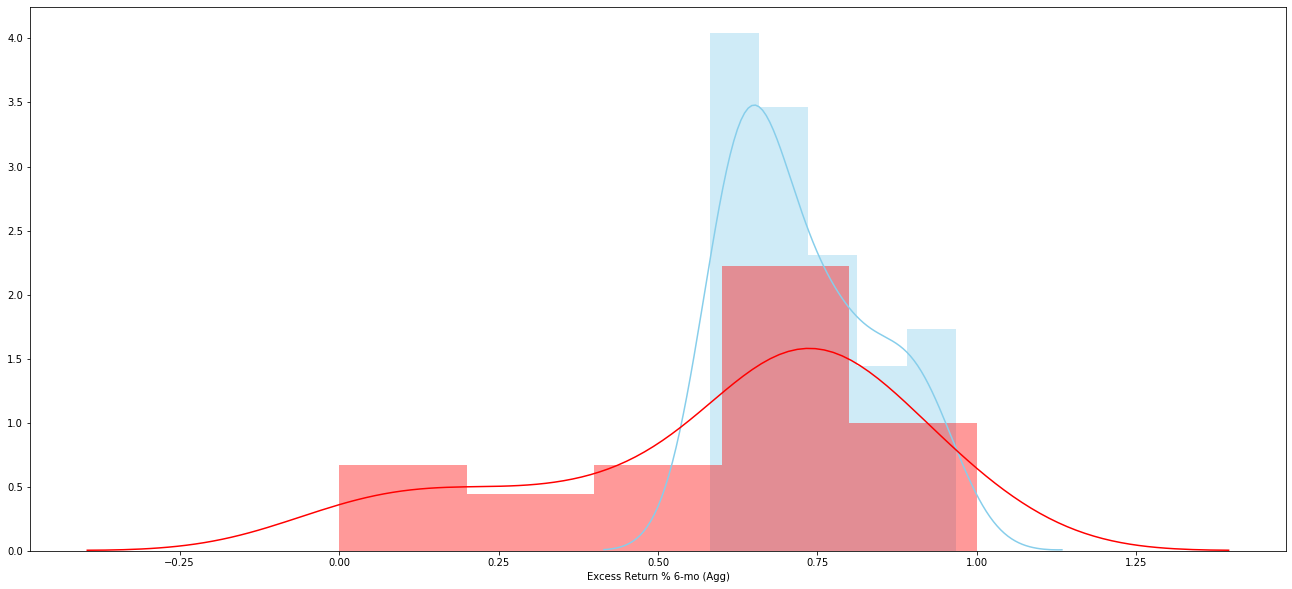

In [18]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 6-mo (Agg)"], color="red", label="6M_Agg._Normalized_Value")

In [19]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 9-mo (Treasury)'])

des, res

(                          Variable     N      Mean        SD        SE  \
 0                              OAS  45.0  0.727606  0.112295  0.016740   
 1  Excess Return % 9-mo (Treasury)  45.0  0.582577  0.284226  0.042370   
 2                         combined  90.0  0.655091  0.226914  0.023919   
 
    95% Conf.  Interval  
 0   0.693869  0.761343  
 1   0.497186  0.667968  
 2   0.607565  0.702618  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 9-mo (Treasu...   0.1450
 1                              Degrees of freedom =   88.0000
 2                                               t =    3.1835
 3                           Two side test p value =    0.0020
 4                          Difference < 0 p value =    0.9990
 5                          Difference > 0 p value =    0.0010
 6                                       Cohen's d =    0.6711
 7                                       Hedge's g =    0.6654
 8                        

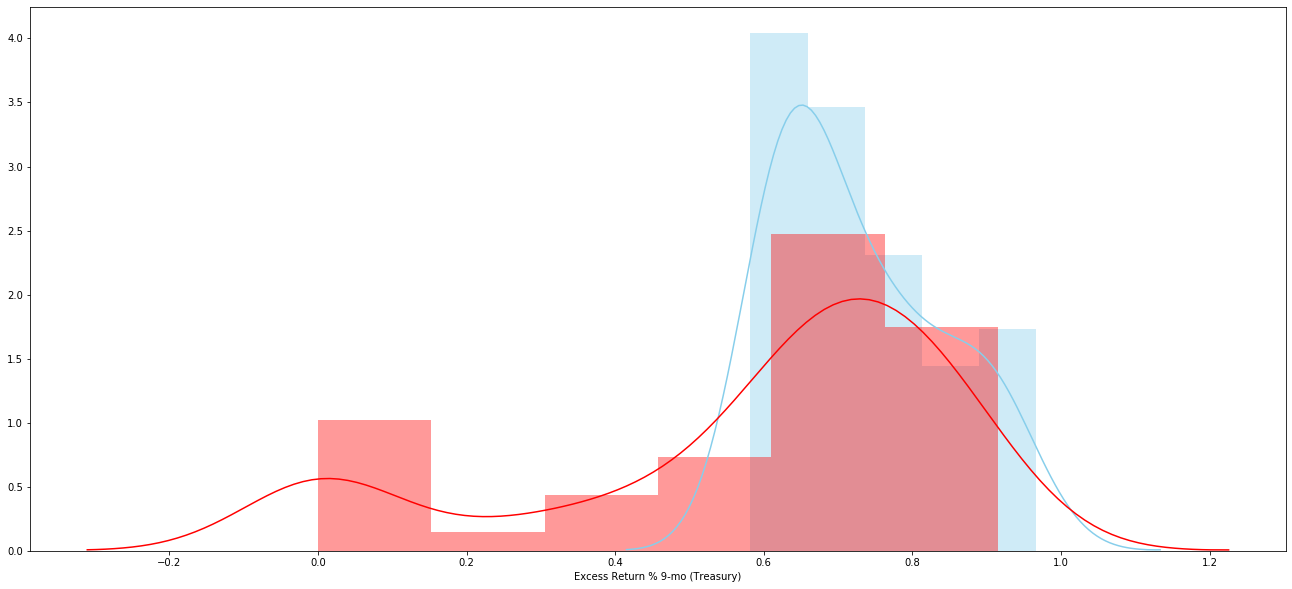

In [20]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 9-mo (Treasury)"], color="red", label="9M_Tres._Normalized_Value")

In [21]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 9-mo (Agg)'])

des, res

(                     Variable     N      Mean        SD        SE  95% Conf.  \
 0                         OAS  45.0  0.727606  0.112295  0.016740   0.693869   
 1  Excess Return % 9-mo (Agg)  45.0  0.587425  0.280267  0.041780   0.503223   
 2                    combined  90.0  0.657515  0.223687  0.023579   0.610665   
 
    Interval  
 0  0.761343  
 1  0.671626  
 2  0.704366  ,
                                  Independent t-test  results
 0  Difference (OAS - Excess Return % 9-mo (Agg)) =    0.1402
 1                             Degrees of freedom =   88.0000
 2                                              t =    3.1145
 3                          Two side test p value =    0.0025
 4                         Difference < 0 p value =    0.9988
 5                         Difference > 0 p value =    0.0012
 6                                      Cohen's d =    0.6566
 7                                      Hedge's g =    0.6510
 8                                  Glass's delta =    

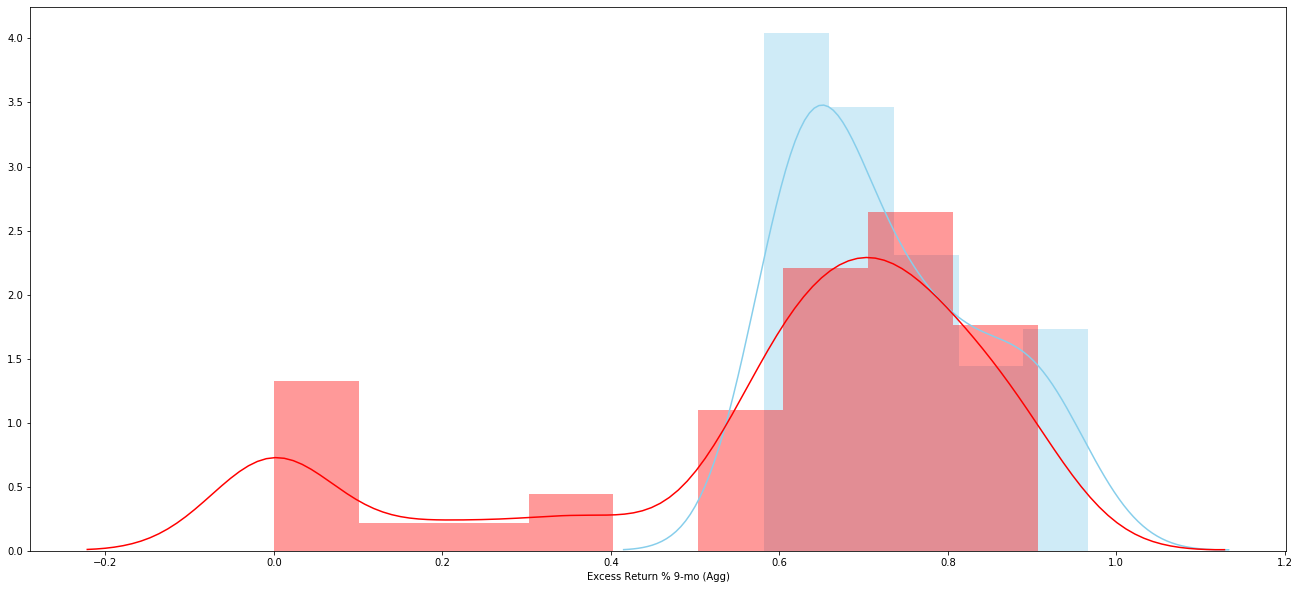

In [22]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 9-mo (Agg)"], color="red", label="9M_Agg._Normalized_Value")

In [23]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 12-mo (Treasury)'])

des, res

(                           Variable     N      Mean        SD        SE  \
 0                               OAS  45.0  0.727606  0.112295  0.016740   
 1  Excess Return % 12-mo (Treasury)  45.0  0.577893  0.271834  0.040523   
 2                          combined  90.0  0.652750  0.220074  0.023198   
 
    95% Conf.  Interval  
 0   0.693869  0.761343  
 1   0.496225  0.659561  
 2   0.606656  0.698843  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 12-mo (Treas...   0.1497
 1                              Degrees of freedom =   88.0000
 2                                               t =    3.4147
 3                           Two side test p value =    0.0010
 4                          Difference < 0 p value =    0.9995
 5                          Difference > 0 p value =    0.0005
 6                                       Cohen's d =    0.7199
 7                                       Hedge's g =    0.7137
 8                    

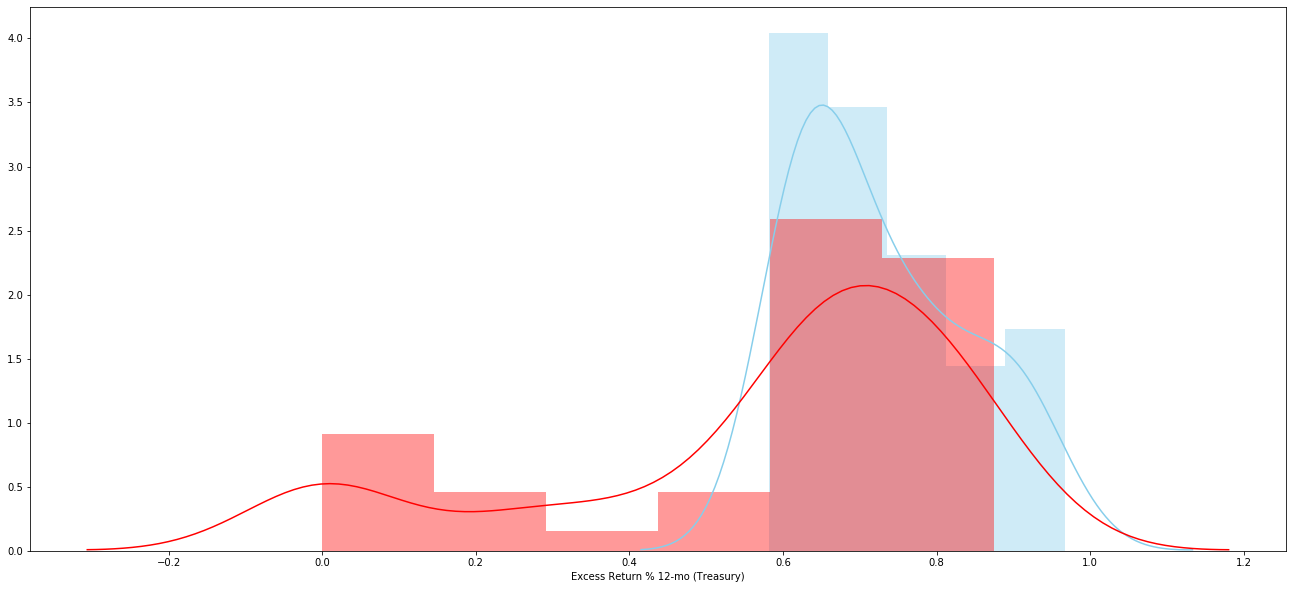

In [24]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 12-mo (Treasury)"], color="red", label="12M_Tres._Normalized_Value")

In [25]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 12-mo (Agg)'])

des, res

(                      Variable     N      Mean        SD        SE  95% Conf.  \
 0                          OAS  45.0  0.727606  0.112295  0.016740   0.693869   
 1  Excess Return % 12-mo (Agg)  45.0  0.606712  0.282411  0.042099   0.521867   
 2                     combined  90.0  0.667159  0.222169  0.023419   0.620627   
 
    Interval  
 0  0.761343  
 1  0.691558  
 2  0.713691  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 12-mo (Agg)) =    0.1209
 1                              Degrees of freedom =   88.0000
 2                                               t =    2.6684
 3                           Two side test p value =    0.0091
 4                          Difference < 0 p value =    0.9955
 5                          Difference > 0 p value =    0.0045
 6                                       Cohen's d =    0.5626
 7                                       Hedge's g =    0.5577
 8                                   Glass

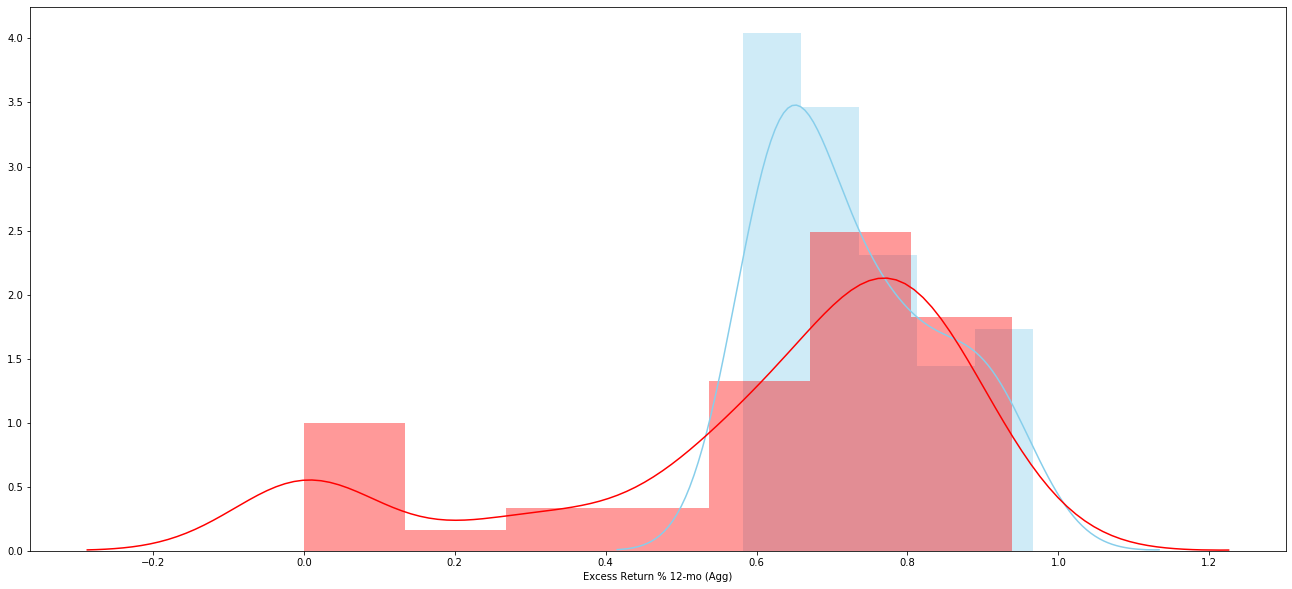

In [26]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 12-mo (Agg)"], color="red", label="12M_Agg._Normalized_Value")

In [27]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 24-mo (Treasury)'])

des, res

(                           Variable     N      Mean        SD       SE  \
 0                               OAS  45.0  0.727606  0.112295  0.01674   
 1  Excess Return % 24-mo (Treasury)  45.0  0.683445  0.187559  0.02796   
 2                          combined  90.0  0.705526  0.155303  0.01637   
 
    95% Conf.  Interval  
 0   0.693869  0.761343  
 1   0.627096  0.739794  
 2   0.672998  0.738053  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 24-mo (Treas...   0.0442
 1                              Degrees of freedom =   88.0000
 2                                               t =    1.3551
 3                           Two side test p value =    0.1788
 4                          Difference < 0 p value =    0.9106
 5                          Difference > 0 p value =    0.0894
 6                                       Cohen's d =    0.2857
 7                                       Hedge's g =    0.2832
 8                        

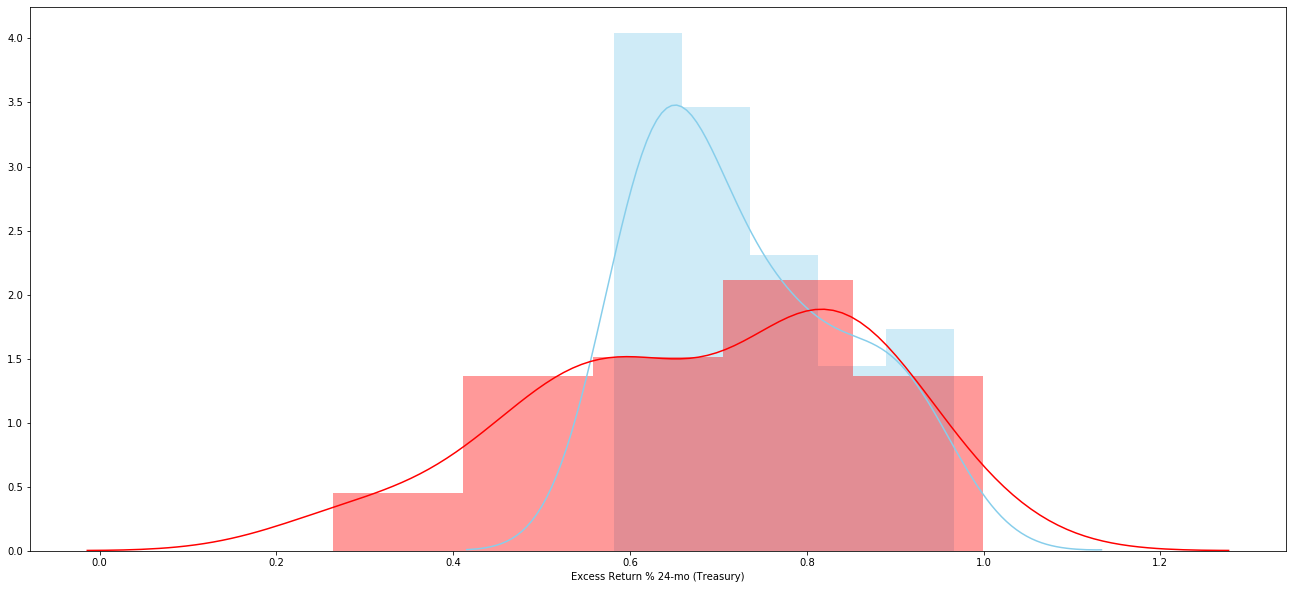

In [28]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 24-mo (Treasury)"], color="red", label="24M_Tres._Normalized_Value")

In [29]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 24-mo (Agg)'])

des, res

(                      Variable     N      Mean        SD        SE  95% Conf.  \
 0                          OAS  45.0  0.727606  0.112295  0.016740   0.693869   
 1  Excess Return % 24-mo (Agg)  45.0  0.642426  0.121966  0.018182   0.605783   
 2                     combined  90.0  0.685016  0.124189  0.013091   0.659005   
 
    Interval  
 0  0.761343  
 1  0.679069  
 2  0.711027  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 24-mo (Agg)) =    0.0852
 1                              Degrees of freedom =   88.0000
 2                                               t =    3.4466
 3                           Two side test p value =    0.0009
 4                          Difference < 0 p value =    0.9996
 5                          Difference > 0 p value =    0.0004
 6                                       Cohen's d =    0.7266
 7                                       Hedge's g =    0.7204
 8                                   Glass

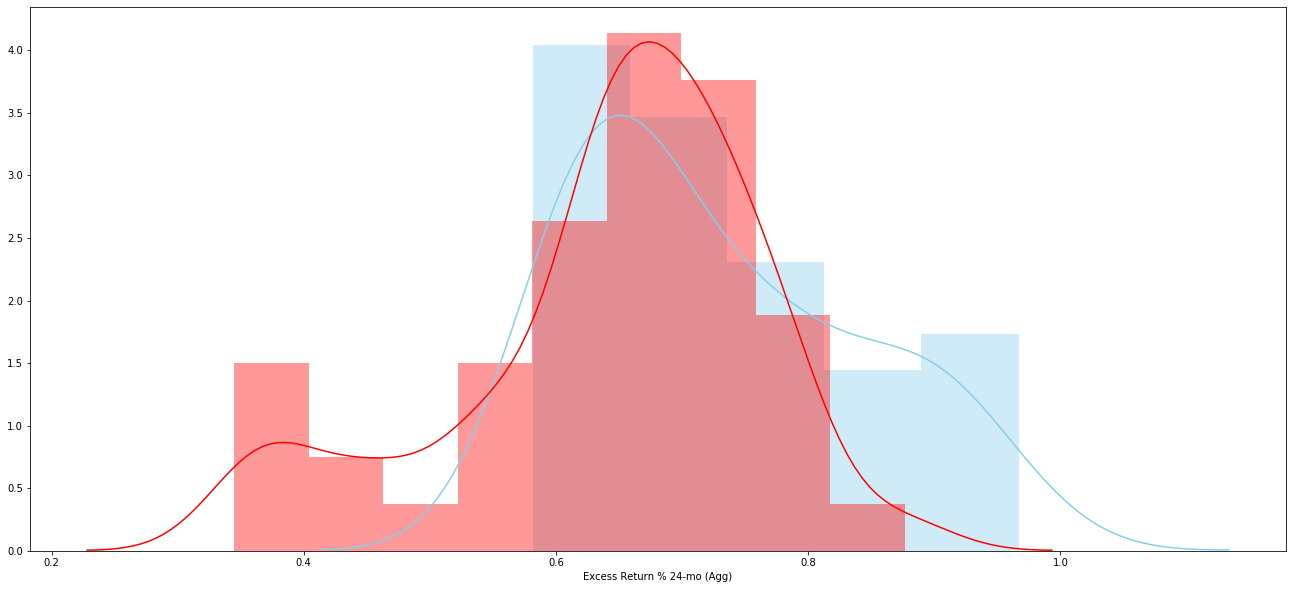

In [30]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 24-mo (Agg)"], color="red", label="24M_Agg._Normalized_Value")

In [31]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 36-mo (Treasury)'])

des, res

(                           Variable     N      Mean        SD        SE  \
 0                               OAS  45.0  0.727606  0.112295  0.016740   
 1  Excess Return % 36-mo (Treasury)  45.0  0.646902  0.076246  0.011366   
 2                          combined  90.0  0.687254  0.103706  0.010932   
 
    95% Conf.  Interval  
 0   0.693869  0.761343  
 1   0.623995  0.669808  
 2   0.665533  0.708975  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 36-mo (Treas...   0.0807
 1                              Degrees of freedom =   88.0000
 2                                               t =    3.9885
 3                           Two side test p value =    0.0001
 4                          Difference < 0 p value =    0.9999
 5                          Difference > 0 p value =    0.0001
 6                                       Cohen's d =    0.8409
 7                                       Hedge's g =    0.8337
 8                    

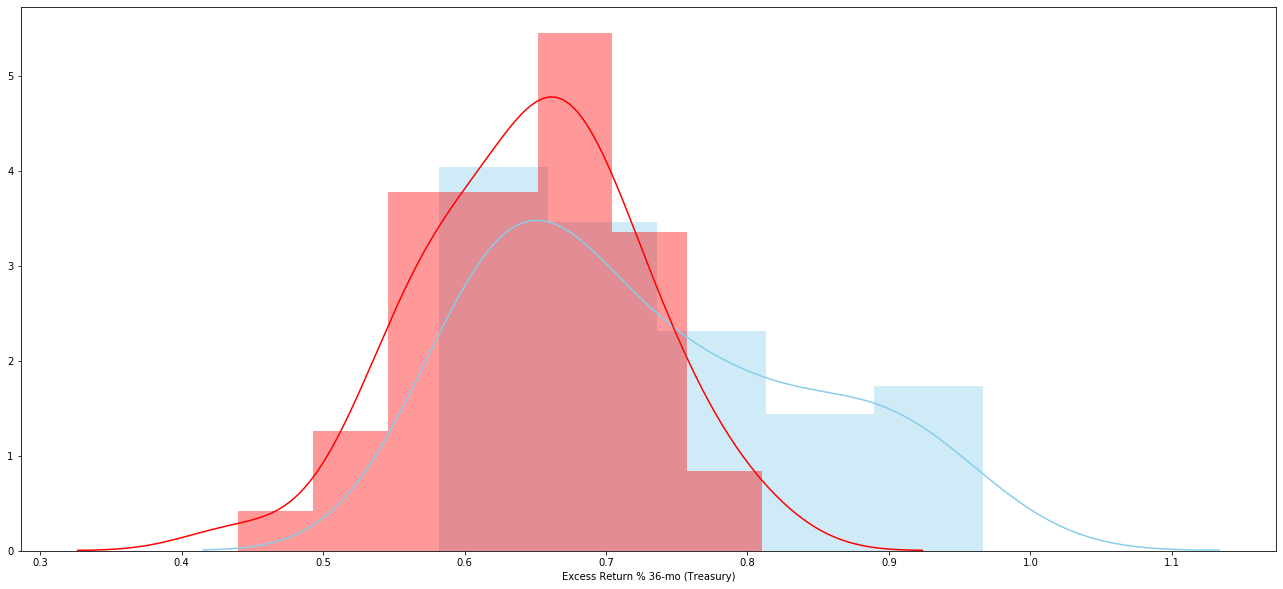

In [32]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 36-mo (Treasury)"], color="red", label="36M_Tres._Normalized_Value")

In [33]:
des, res = researchpy.ttest(df['OAS'], df['Excess Return % 36-mo (Agg)'])

des, res

(                      Variable     N      Mean        SD        SE  95% Conf.  \
 0                          OAS  45.0  0.727606  0.112295  0.016740   0.693869   
 1  Excess Return % 36-mo (Agg)  45.0  0.654904  0.067431  0.010052   0.634645   
 2                     combined  90.0  0.691255  0.099088  0.010445   0.670501   
 
    Interval  
 0  0.761343  
 1  0.675162  
 2  0.712008  ,
                                   Independent t-test  results
 0  Difference (OAS - Excess Return % 36-mo (Agg)) =    0.0727
 1                              Degrees of freedom =   88.0000
 2                                               t =    3.7233
 3                           Two side test p value =    0.0003
 4                          Difference < 0 p value =    0.9998
 5                          Difference > 0 p value =    0.0002
 6                                       Cohen's d =    0.7849
 7                                       Hedge's g =    0.7782
 8                                   Glass

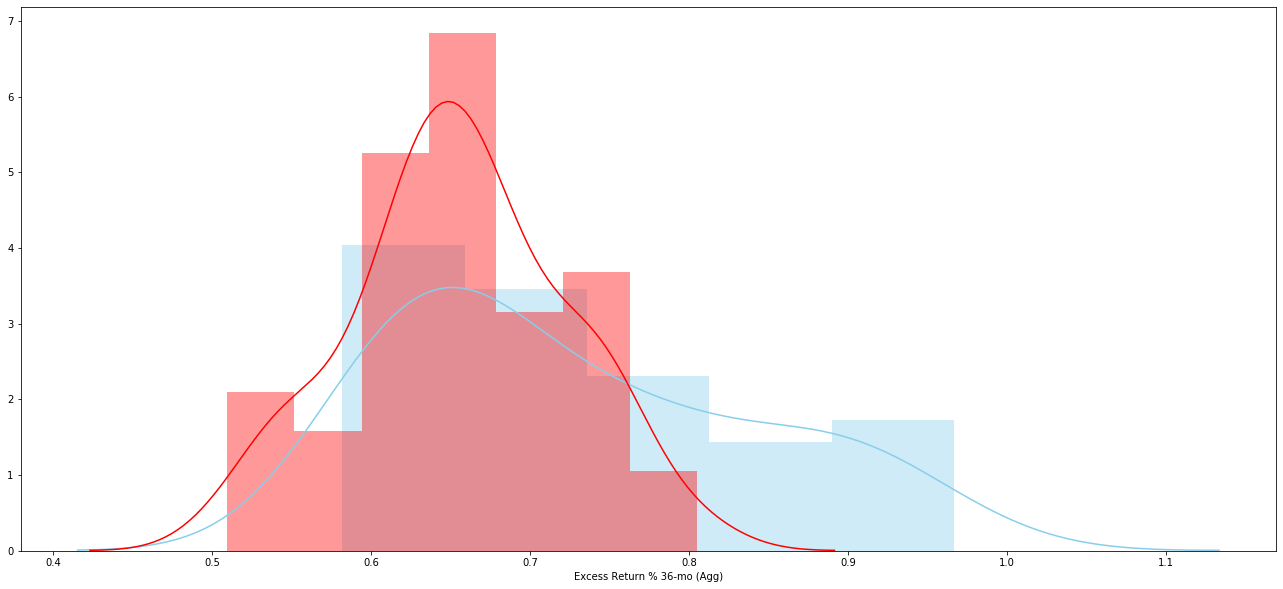

In [34]:
plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df["Excess Return % 36-mo (Agg)"], color="red", label="36M_Agg._Normalized_Value")

# Now lets run the same t-test but with High spreads to all returns

In [35]:
df1 = pd.read_csv('minmax_OAS_with_Returns_Final_NO_Outliers_IG.csv') 

In [36]:
df1.describe()

,OAS,Total Return % 1-mo-LOC,Agg Returns,Excess Return % 1-mo (Treasury),Excess Return % 1-mo (Agg),Excess Return % 3-mo (Treasury),Excess Return % 3-mo (Agg),Excess Return % 6-mo (Treasury),Excess Return % 6-mo (Agg),Excess Return % 9-mo (Treasury),Excess Return % 9-mo (Agg),Excess Return % 12-mo (Treasury),Excess Return % 12-mo (Agg),Excess Return % 24-mo (Treasury),Excess Return % 24-mo (Agg),Excess Return % 36-mo (Treasury),Excess Return % 36-mo (Agg),Quadrant
count,279.000000,279.000000,279.000000,279.000000,279.000000,277.000000,277.000000,274.000000,274.000000,270.000000,270.000000,267.000000,267.000000,257.000000,257.000000,245.000000,245.000000,279.00000
mean,0.417782,0.610519,0.534440,0.504132,0.499413,0.494780,0.503562,0.482637,0.502400,0.492097,0.498393,0.491650,0.504837,0.509006,0.492070,0.501216,0.509136,2.55914
std,0.243309,0.118164,0.137960,0.243397,0.228002,0.227093,0.207410,0.224126,0.208517,0.216277,0.201213,0.212409,0.208761,0.226952,0.198216,0.196648,0.187849,1.08418
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.00000
25%,0.238259,0.555074,0.456258,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,0.375000,2.00000
50%,0.375716,0.614830,0.539434,0.521049,0.502388,0.516951,0.505593,0.477463,0.484370,0.501543,0.487557,0.504171,0.498794,0.502269,0.492280,0.526284,0.541649,3.00000
75%,0.542955,0.673396,0.622920,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,0.625000,3.00000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.00000


In [37]:
des, res = researchpy.ttest(df['OAS'], 
df1['Excess Return % 3-mo (Treasury)']) # notice we are using the High Spread Data for OAS

des, res

(                          Variable      N      Mean        SD        SE  \
 0                              OAS   45.0  0.727606  0.112295  0.016740   
 1  Excess Return % 3-mo (Treasury)  277.0  0.494780  0.227093  0.013645   
 2                         combined  322.0  0.527318  0.229363  0.012782   
 
    95% Conf.  Interval  
 0   0.693869  0.761343  
 1   0.467919  0.521641  
 2   0.502171  0.552465  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 3-mo (Treasu...    0.2328
 1                              Degrees of freedom =   320.0000
 2                                               t =     6.7385
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.0830
 7                                       Hedge's g =     1.0805
 8           

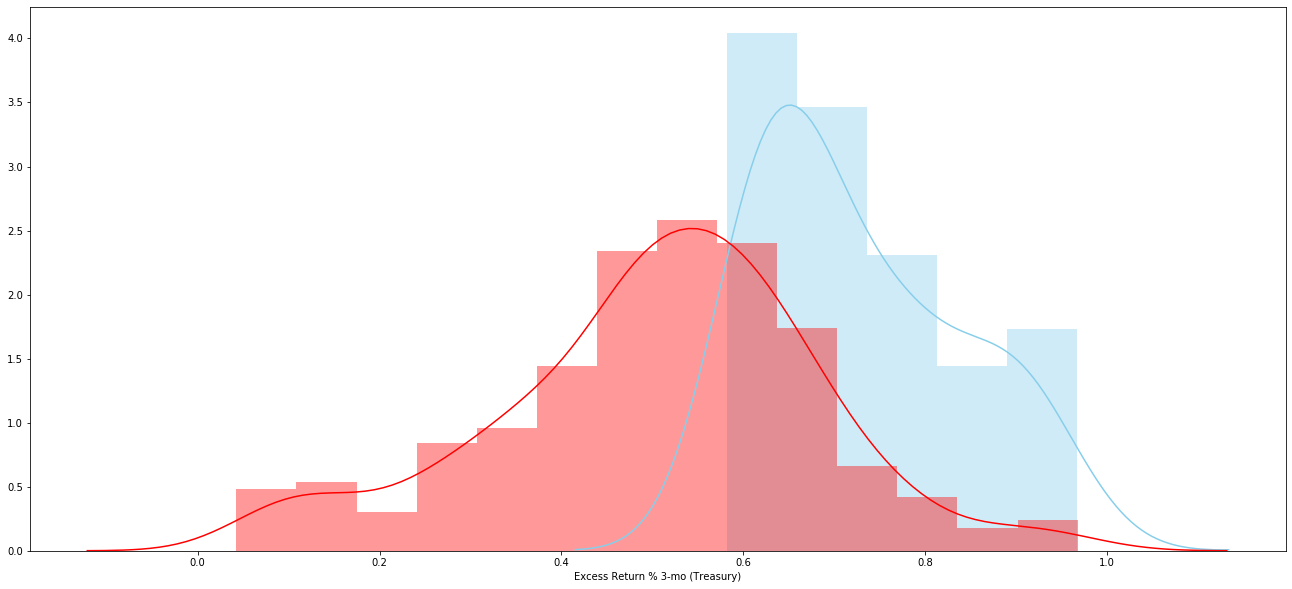

In [38]:
df1["Excess Return % 3-mo (Treasury)"] = df1["Excess Return % 3-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 3-mo (Treasury)"] = df1["Excess Return % 3-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 3-mo (Treasury)"], color="red", label="3M_Tres._Normalized_Value")

In [39]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 3-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0                         OAS   45.0  0.727606  0.112295  0.016740   0.693869   
 1  Excess Return % 3-mo (Agg)  277.0  0.503562  0.207410  0.012462   0.479029   
 2                    combined  322.0  0.534873  0.211590  0.011791   0.511674   
 
    Interval  
 0  0.761343  
 1  0.528095  
 2  0.558071  ,
                                  Independent t-test   results
 0  Difference (OAS - Excess Return % 3-mo (Agg)) =     0.2240
 1                             Degrees of freedom =   320.0000
 2                                              t =     7.0733
 3                          Two side test p value =     0.0000
 4                         Difference < 0 p value =     1.0000
 5                         Difference > 0 p value =     0.0000
 6                                      Cohen's d =     1.1369
 7                                      Hedge's g =     1.1342
 8                                  Glass'

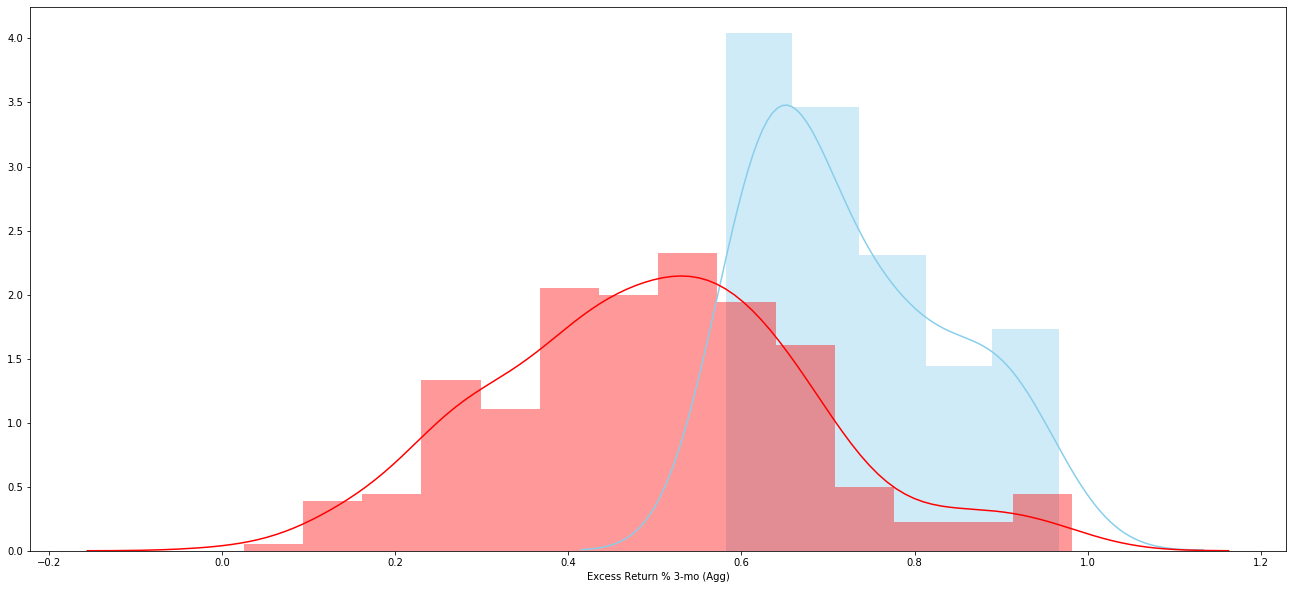

In [40]:
df1["Excess Return % 3-mo (Agg)"] = df1["Excess Return % 3-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 3-mo (Agg)"] = df1["Excess Return % 3-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 3-mo (Agg)"], color="red", label="3M_Agg._Normalized_Value")

In [41]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 6-mo (Treasury)'])

des, res

(                          Variable      N      Mean        SD        SE  \
 0                              OAS   45.0  0.727606  0.112295  0.016740   
 1  Excess Return % 6-mo (Treasury)  274.0  0.482637  0.224126  0.013540   
 2                         combined  319.0  0.517194  0.228392  0.012787   
 
    95% Conf.  Interval  
 0   0.693869  0.761343  
 1   0.455981  0.509293  
 2   0.492035  0.542353  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 6-mo (Treasu...    0.2450
 1                              Degrees of freedom =   317.0000
 2                                               t =     7.1786
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.1547
 7                                       Hedge's g =     1.1519
 8           

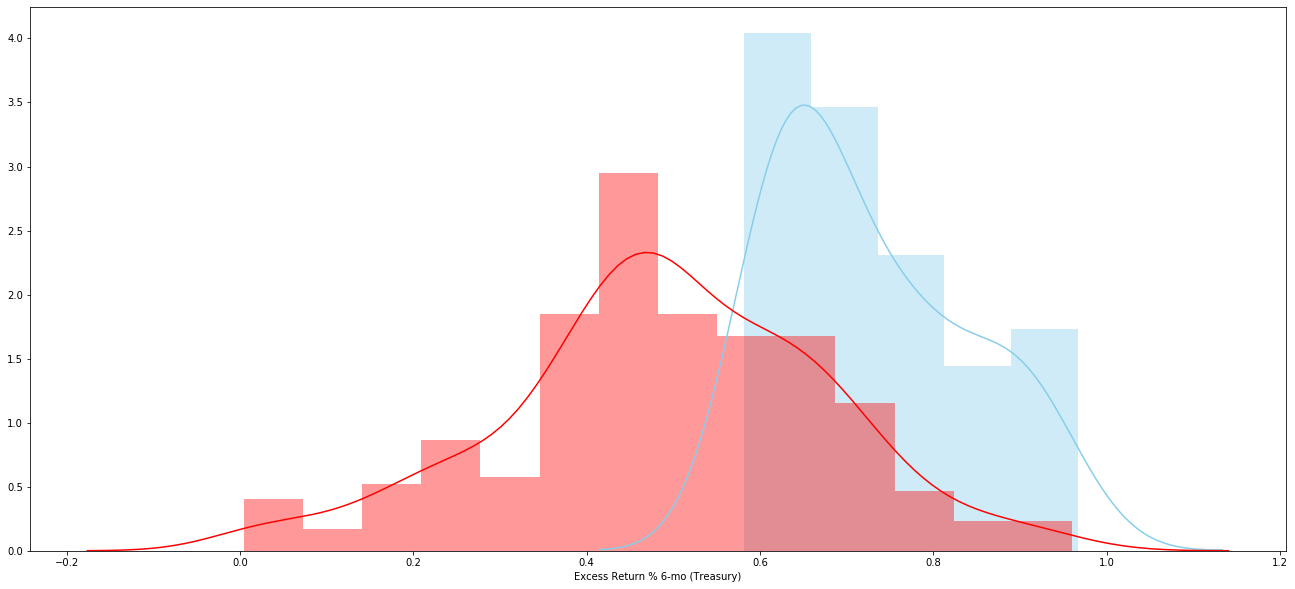

In [42]:
df1["Excess Return % 6-mo (Treasury)"] = df1["Excess Return % 6-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 6-mo (Treasury)"] = df1["Excess Return % 6-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 6-mo (Treasury)"], color="red", label="6M_Tres._Normalized_Value")

In [43]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 6-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0                         OAS   45.0  0.727606  0.112295  0.016740   0.693869   
 1  Excess Return % 6-mo (Agg)  274.0  0.502400  0.208517  0.012597   0.477601   
 2                    combined  319.0  0.534169  0.212687  0.011908   0.510740   
 
    Interval  
 0  0.761343  
 1  0.527200  
 2  0.557598  ,
                                  Independent t-test   results
 0  Difference (OAS - Excess Return % 6-mo (Agg)) =     0.2252
 1                             Degrees of freedom =   317.0000
 2                                              t =     7.0722
 3                          Two side test p value =     0.0000
 4                         Difference < 0 p value =     1.0000
 5                         Difference > 0 p value =     0.0000
 6                                      Cohen's d =     1.1375
 7                                      Hedge's g =     1.1348
 8                                  Glass'

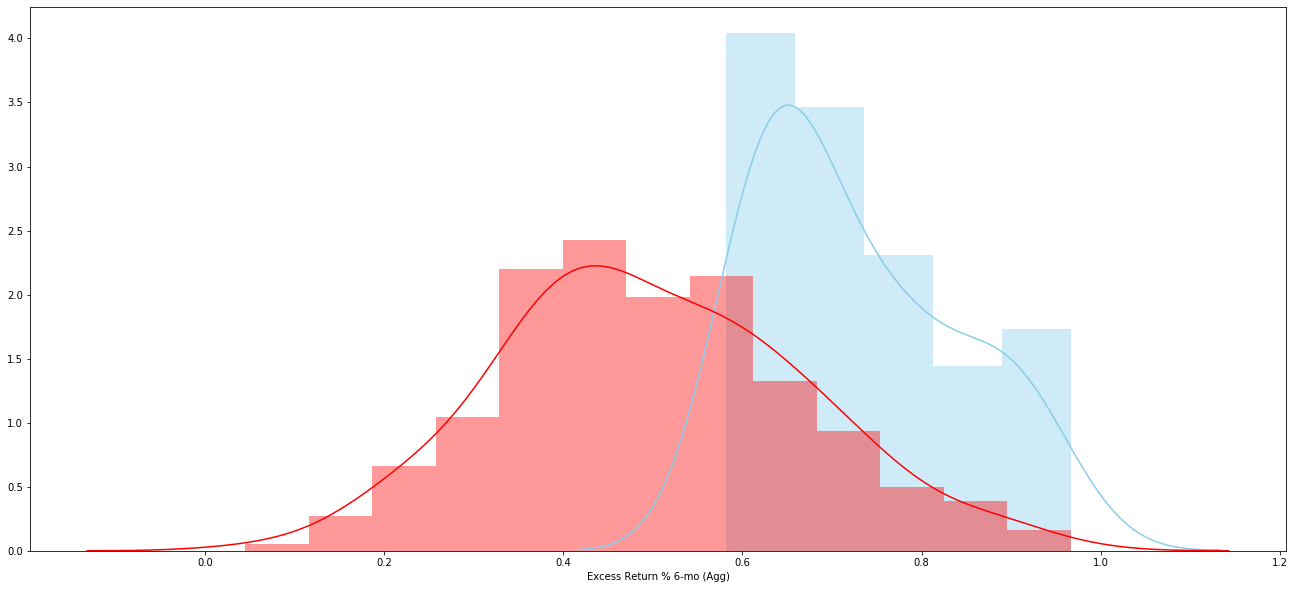

In [44]:
df1["Excess Return % 6-mo (Agg)"] = df1["Excess Return % 6-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 6-mo (Agg)"] = df1["Excess Return % 6-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 6-mo (Agg)"], color="red", label="6M_Agg._Normalized_Value")

In [45]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 9-mo (Treasury)'])

des, res

(                          Variable      N      Mean        SD        SE  \
 0                              OAS   45.0  0.727606  0.112295  0.016740   
 1  Excess Return % 9-mo (Treasury)  270.0  0.492097  0.216277  0.013162   
 2                         combined  315.0  0.525741  0.220573  0.012428   
 
    95% Conf.  Interval  
 0   0.693869  0.761343  
 1   0.466183  0.518011  
 2   0.501289  0.550194  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 9-mo (Treasu...    0.2355
 1                              Degrees of freedom =   313.0000
 2                                               t =     7.1393
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.1495
 7                                       Hedge's g =     1.1468
 8           

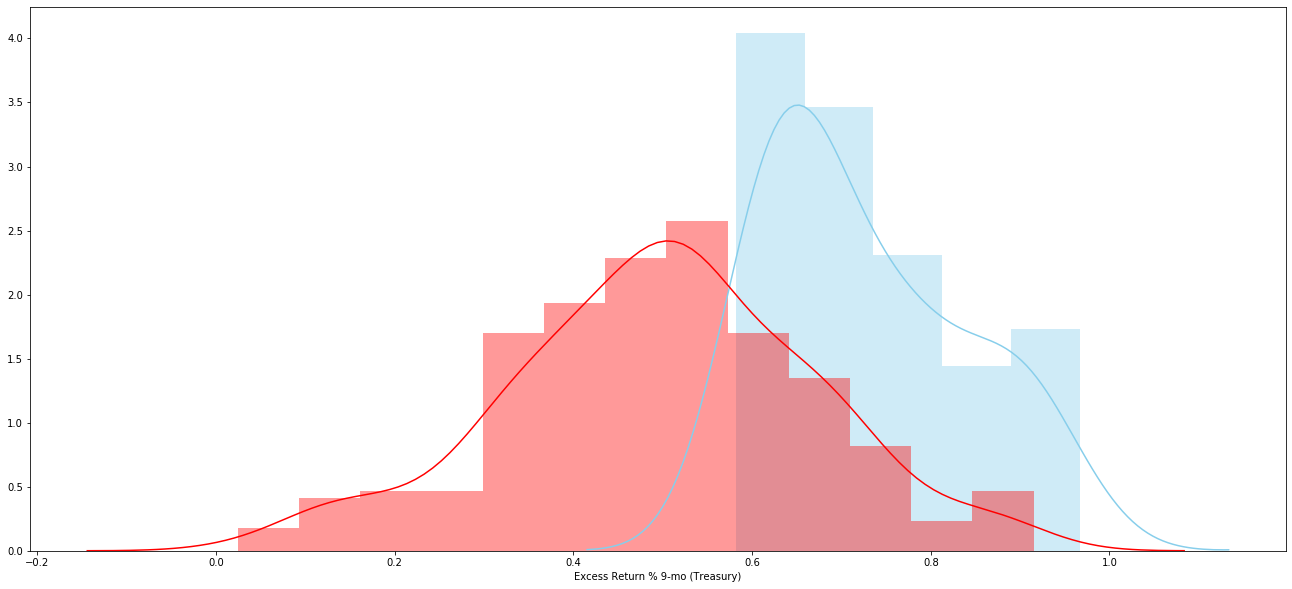

In [46]:
df1["Excess Return % 9-mo (Treasury)"] = df1["Excess Return % 9-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 9-mo (Treasury)"] = df1["Excess Return % 9-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 9-mo (Treasury)"], color="red", label="9M_Tres._Normalized_Value")

In [47]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 9-mo (Agg)'])

des, res

(                     Variable      N      Mean        SD        SE  95% Conf.  \
 0                         OAS   45.0  0.727606  0.112295  0.016740   0.693869   
 1  Excess Return % 9-mo (Agg)  270.0  0.498393  0.201213  0.012245   0.474284   
 2                    combined  315.0  0.531137  0.207136  0.011671   0.508175   
 
    Interval  
 0  0.761343  
 1  0.522502  
 2  0.554100  ,
                                  Independent t-test   results
 0  Difference (OAS - Excess Return % 9-mo (Agg)) =     0.2292
 1                             Degrees of freedom =   313.0000
 2                                              t =     7.4443
 3                          Two side test p value =     0.0000
 4                         Difference < 0 p value =     1.0000
 5                         Difference > 0 p value =     0.0000
 6                                      Cohen's d =     1.1986
 7                                      Hedge's g =     1.1958
 8                                  Glass'

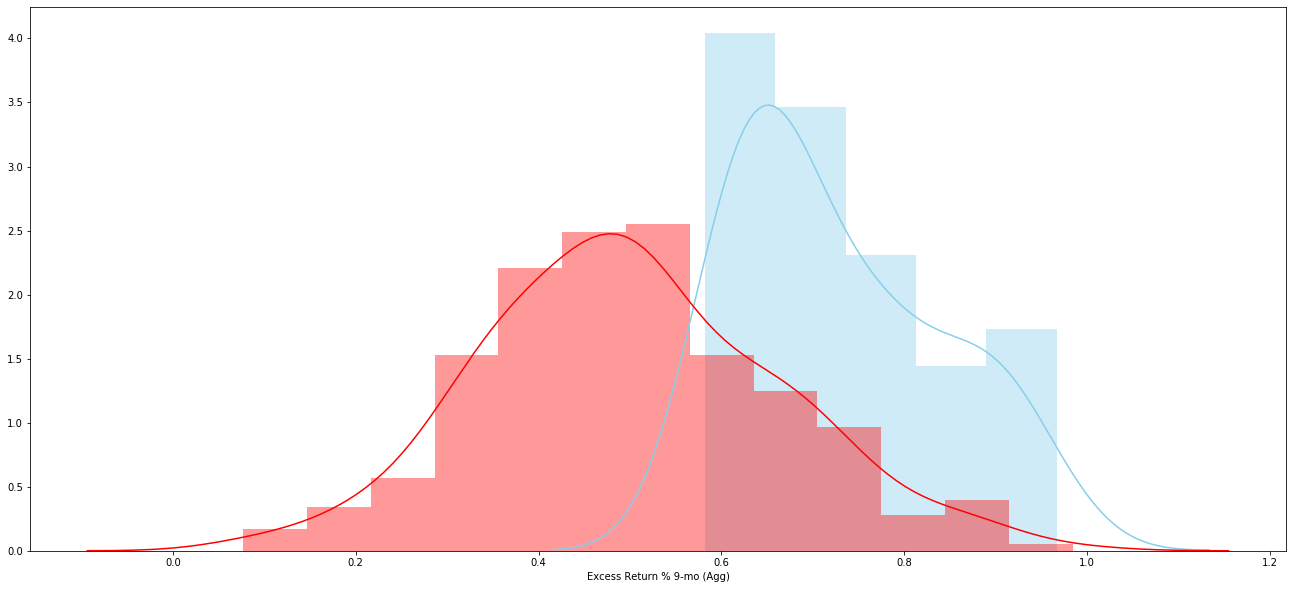

In [48]:
df1["Excess Return % 9-mo (Agg)"] = df1["Excess Return % 9-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 9-mo (Agg)"] = df1["Excess Return % 9-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 9-mo (Agg)"], color="red", label="9M_Agg._Normalized_Value")

In [49]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 12-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0                               OAS   45.0  0.727606  0.112295  0.016740   
 1  Excess Return % 12-mo (Treasury)  267.0  0.491650  0.212409  0.012999   
 2                          combined  312.0  0.525682  0.217411  0.012308   
 
    95% Conf.  Interval  
 0   0.693869  0.761343  
 1   0.466056  0.517245  
 2   0.501464  0.549901  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 12-mo (Treas...    0.2360
 1                              Degrees of freedom =   310.0000
 2                                               t =     7.2756
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.1724
 7                                       Hedge's g =     1.1696
 8       

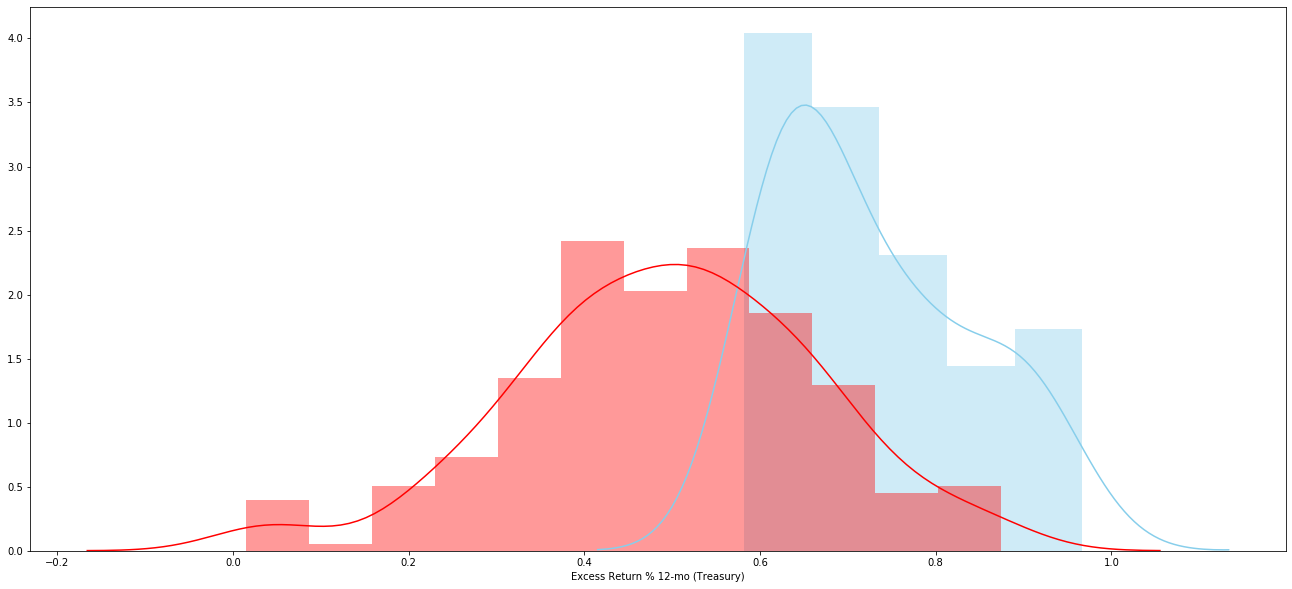

In [50]:
df1["Excess Return % 12-mo (Treasury)"] = df1["Excess Return % 12-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 12-mo (Treasury)"] = df1["Excess Return % 12-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 12-mo (Treasury)"], color="red", label="12M_Tres._Normalized_Value")

In [51]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 12-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0                          OAS   45.0  0.727606  0.112295  0.016740   
 1  Excess Return % 12-mo (Agg)  267.0  0.504837  0.208761  0.012776   
 2                     combined  312.0  0.536967  0.212613  0.012037   
 
    95% Conf.  Interval  
 0   0.693869  0.761343  
 1   0.479682  0.529992  
 2   0.513283  0.560651  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 12-mo (Agg)) =     0.2228
 1                              Degrees of freedom =   310.0000
 2                                               t =     6.9836
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.1254
 7                                       Hedge's g =     1.1226
 8                           

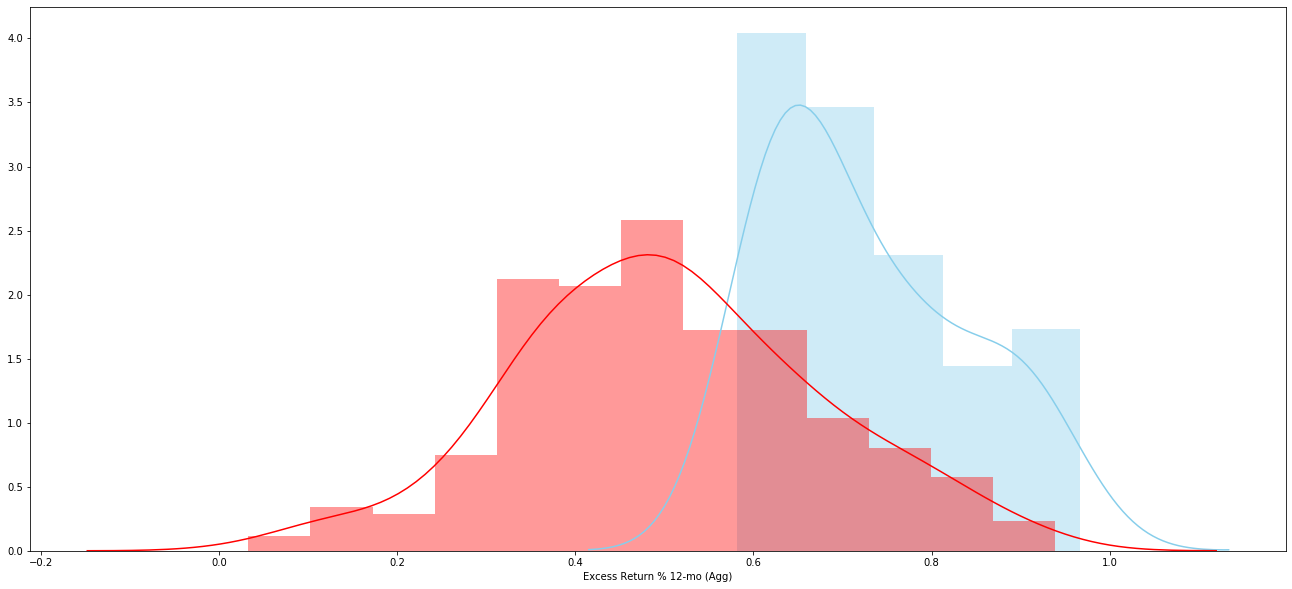

In [52]:
df1["Excess Return % 12-mo (Agg)"] = df1["Excess Return % 12-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 12-mo (Agg)"] = df1["Excess Return % 12-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 12-mo (Agg)"], color="red", label="12M_Agg._Normalized_Value")

In [53]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 24-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0                               OAS   45.0  0.727606  0.112295  0.016740   
 1  Excess Return % 24-mo (Treasury)  257.0  0.509006  0.226952  0.014157   
 2                          combined  302.0  0.541579  0.227441  0.013088   
 
    95% Conf.  Interval  
 0   0.693869  0.761343  
 1   0.481127  0.536885  
 2   0.515824  0.567334  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 24-mo (Treas...    0.2186
 1                              Degrees of freedom =   300.0000
 2                                               t =     6.3209
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.0214
 7                                       Hedge's g =     1.0189
 8       

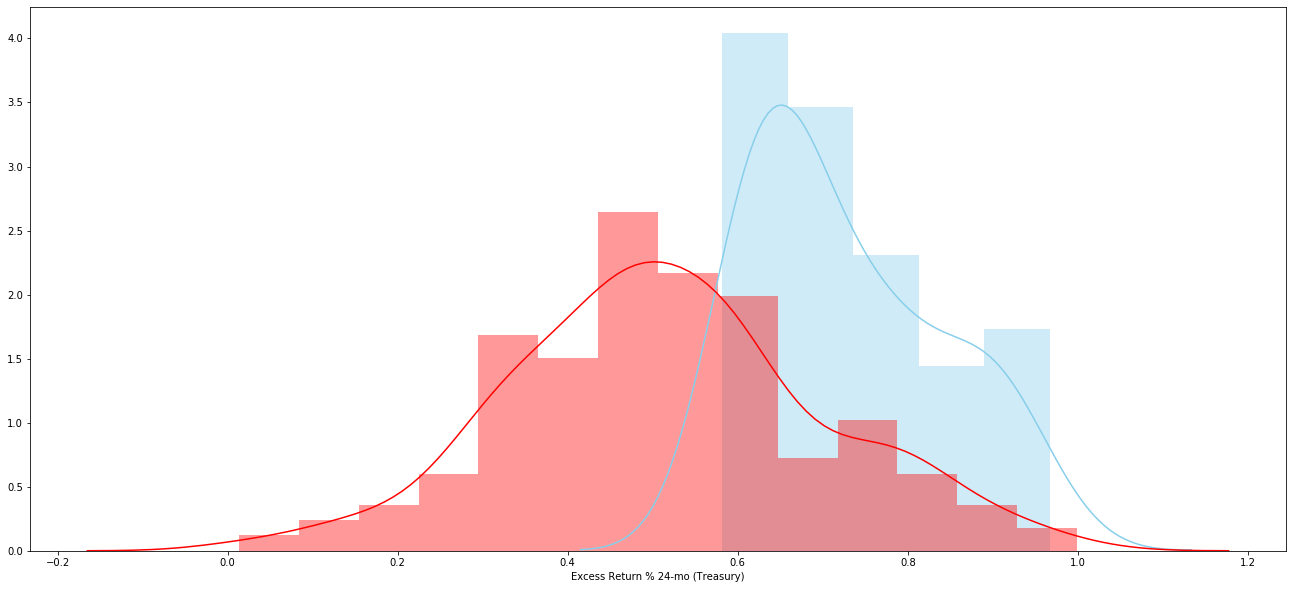

In [54]:
df1["Excess Return % 24-mo (Treasury)"] = df1["Excess Return % 24-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 24-mo (Treasury)"] = df1["Excess Return % 24-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 24-mo (Treasury)"], color="red", label="24M_Tres._Normalized_Value")

In [55]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 24-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0                          OAS   45.0  0.727606  0.112295  0.016740   
 1  Excess Return % 24-mo (Agg)  257.0  0.492070  0.198216  0.012364   
 2                     combined  302.0  0.527167  0.205711  0.011837   
 
    95% Conf.  Interval  
 0   0.693869  0.761343  
 1   0.467721  0.516419  
 2   0.503872  0.550461  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 24-mo (Agg)) =     0.2355
 1                              Degrees of freedom =   300.0000
 2                                               t =     7.7494
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.2523
 7                                       Hedge's g =     1.2491
 8                           

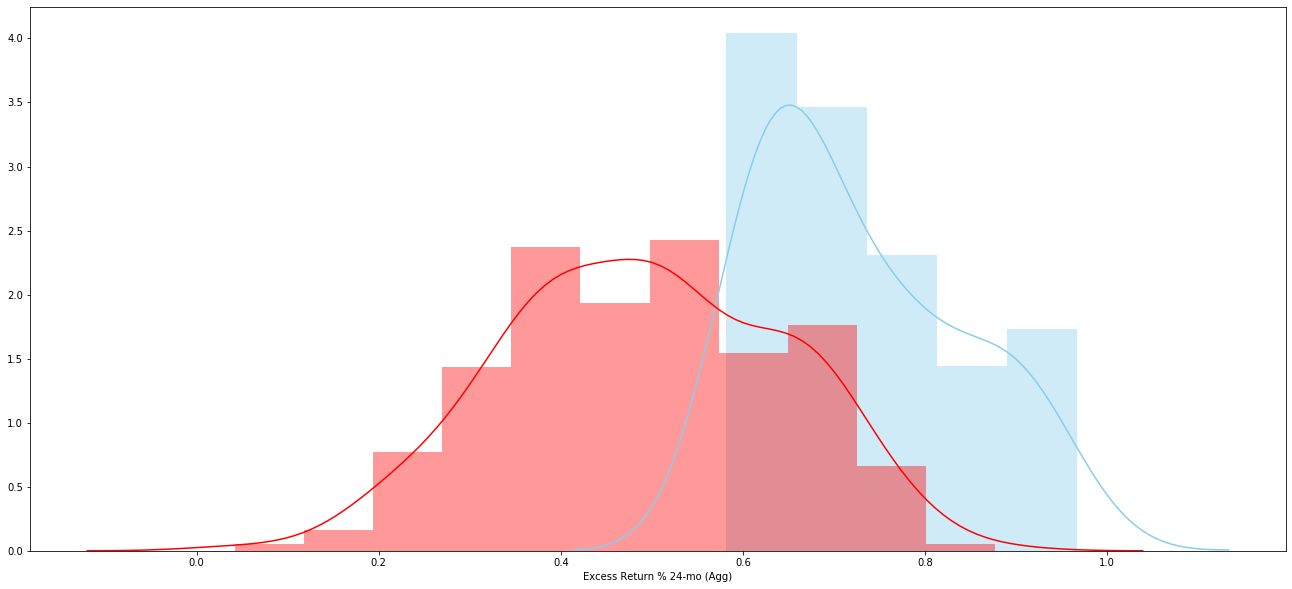

In [56]:
df1["Excess Return % 24-mo (Agg)"] = df1["Excess Return % 24-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 24-mo (Agg)"] = df1["Excess Return % 24-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 24-mo (Agg)"], color="red", label="24M_Agg._Normalized_Value")

In [57]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 36-mo (Treasury)'])

des, res

(                           Variable      N      Mean        SD        SE  \
 0                               OAS   45.0  0.727606  0.112295  0.016740   
 1  Excess Return % 36-mo (Treasury)  245.0  0.501216  0.196648  0.012563   
 2                          combined  290.0  0.536346  0.203251  0.011935   
 
    95% Conf.  Interval  
 0   0.693869  0.761343  
 1   0.476470  0.525962  
 2   0.512854  0.559837  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 36-mo (Treas...    0.2264
 1                              Degrees of freedom =   288.0000
 2                                               t =     7.4947
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.2155
 7                                       Hedge's g =     1.2124
 8       

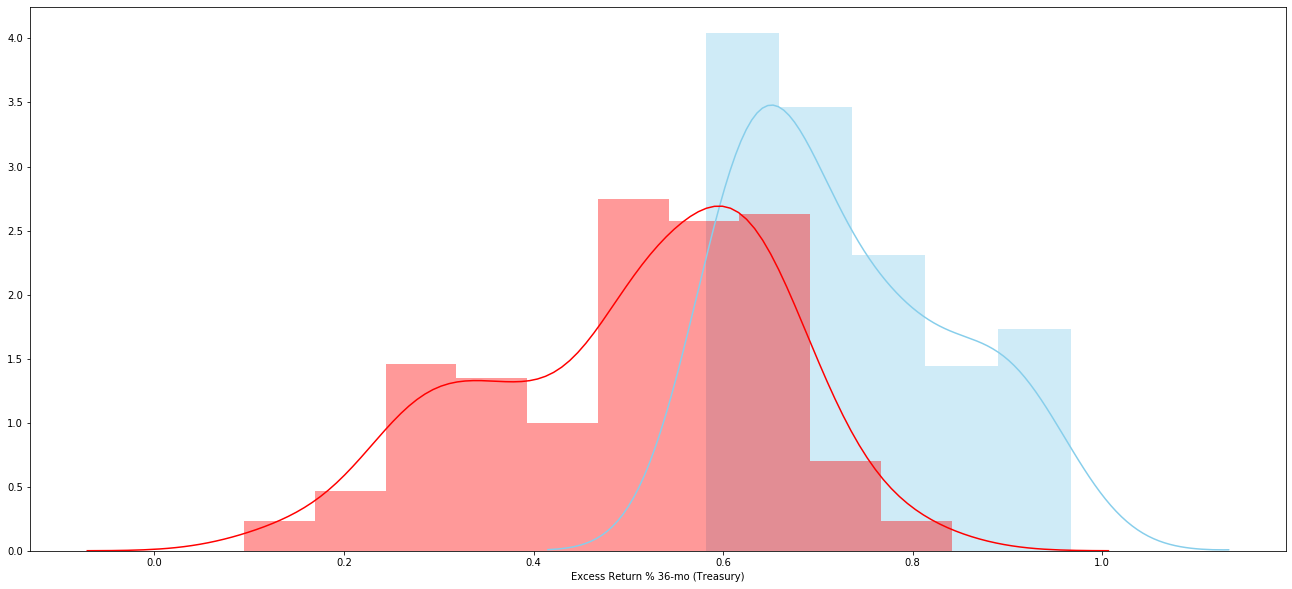

In [58]:
df1["Excess Return % 36-mo (Treasury)"] = df1["Excess Return % 36-mo (Treasury)"].replace([0],["NaN"])
df1["Excess Return % 36-mo (Treasury)"] = df1["Excess Return % 36-mo (Treasury)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 36-mo (Treasury)"], color="red", label="36M_Tres._Normalized_Value")

In [59]:
des, res = researchpy.ttest(df['OAS'], df1['Excess Return % 36-mo (Agg)'])

des, res

(                      Variable      N      Mean        SD        SE  \
 0                          OAS   45.0  0.727606  0.112295  0.016740   
 1  Excess Return % 36-mo (Agg)  245.0  0.509136  0.187849  0.012001   
 2                     combined  290.0  0.543037  0.194913  0.011446   
 
    95% Conf.  Interval  
 0   0.693869  0.761343  
 1   0.485497  0.532775  
 2   0.520509  0.565564  ,
                                   Independent t-test   results
 0  Difference (OAS - Excess Return % 36-mo (Agg)) =     0.2185
 1                              Degrees of freedom =   288.0000
 2                                               t =     7.5511
 3                           Two side test p value =     0.0000
 4                          Difference < 0 p value =     1.0000
 5                          Difference > 0 p value =     0.0000
 6                                       Cohen's d =     1.2247
 7                                       Hedge's g =     1.2215
 8                           

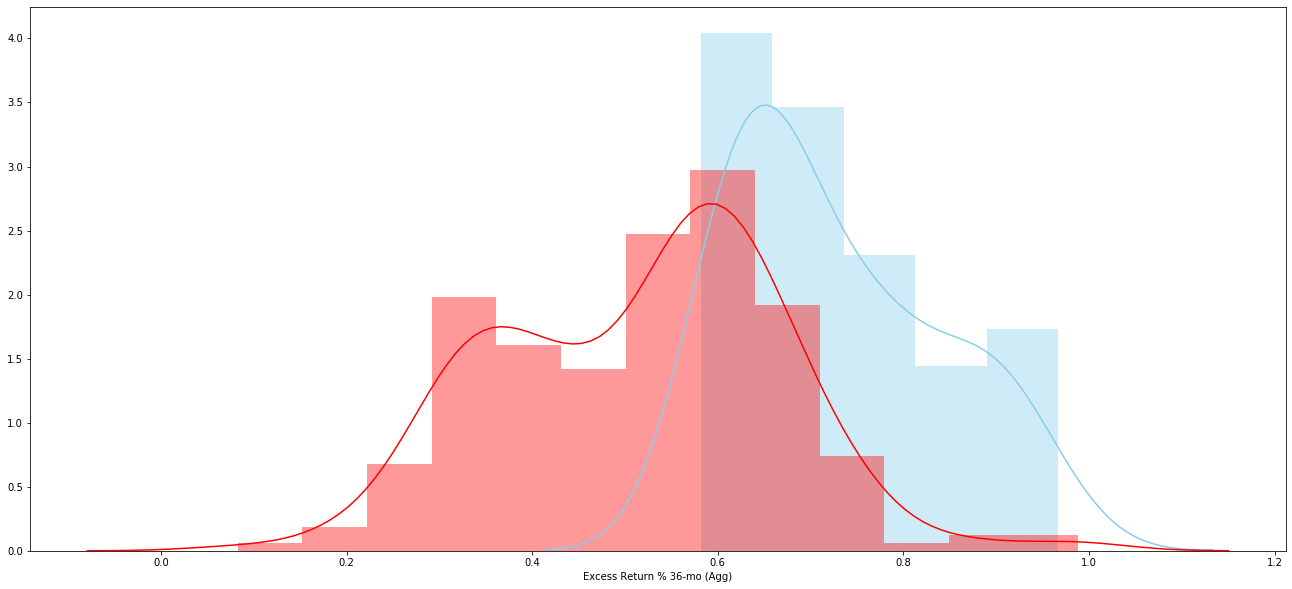

In [60]:
df1["Excess Return % 36-mo (Agg)"] = df1["Excess Return % 36-mo (Agg)"].replace([0],["NaN"])
df1["Excess Return % 36-mo (Agg)"] = df1["Excess Return % 36-mo (Agg)"].replace([1],["NaN"])

plt.figure(figsize=(22.5,10))
sns.distplot(df["OAS"], color="skyblue", label="OAS_Normalized_Value")
sns.distplot(df1["Excess Return % 36-mo (Agg)"], color="red", label="36M_Agg._Normalized_Value")